In [ ]:
!pip install transformers

In [4]:
import torch
import torchvision
from torchvision import models
from torchvision import transforms as T
from PIL import Image
import matplotlib.pyplot as plt

In [5]:
model = models.detection.retinanet_resnet50_fpn(pretrained = True)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=RetinaNet_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=RetinaNet_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/retinanet_resnet50_fpn_coco-eeacb38b.pth" to /root/.cache/torch/hub/checkpoints/retinanet_resnet50_fpn_coco-eeacb38b.pth
100%|██████████| 130M/130M [00:01<00:00, 89.4MB/s]


In [6]:
tf_ = T.ToTensor()

In [9]:
img = Image.open("b.jpg")
transformed = tf_(img)
batched = transformed.unsqueeze(0)
int_image = torch.tensor(transformed*255, dtype = torch.uint8)

<ipython-input-9-d049c07a420e>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  int_image = torch.tensor(transformed*255, dtype = torch.uint8)


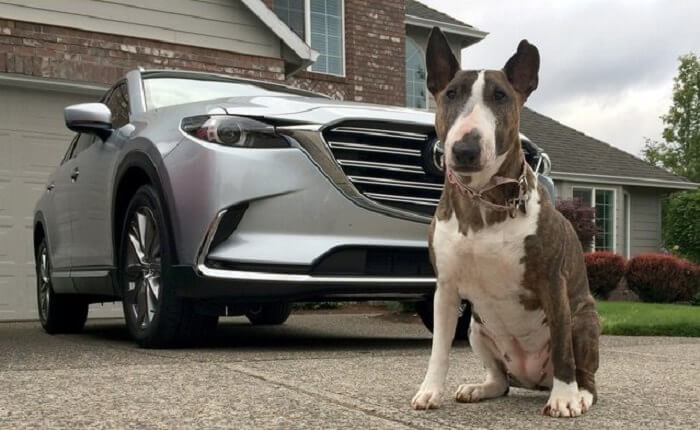

In [10]:
img

In [11]:
model = model.eval()
with torch.no_grad():
    out = model(batched)

In [13]:
from torchvision.utils import draw_bounding_boxes
first_out = out[0]
first_out.keys()

dict_keys(['boxes', 'scores', 'labels'])

In [14]:
first_out

{'boxes': tensor([[ 24.8906,  63.2902, 448.1429, 346.3861],
         [401.6060,  24.7835, 600.4763, 421.5768],
         [399.9969,  24.0716, 596.3738, 416.6288],
         [398.0634,  18.2102, 590.1666, 420.7940],
         [ 21.0377,  66.4367, 473.1692, 344.0595],
         [ 19.0569,  60.4483, 444.4153, 343.3834],
         [404.2220,  16.5782, 597.0887, 422.6538],
         [110.6918,  34.6001, 595.4438, 396.3597],
         [233.3610, 236.2012, 441.6089, 312.8777],
         [559.7714, 202.2567, 599.1042, 254.3644],
         [122.4301, 178.2725, 440.0130, 340.8338],
         [413.5042, 291.3632, 434.8380, 333.6898],
         [ 24.5248, 111.9173, 117.1511, 335.2335],
         [401.0981,  21.6209, 598.4677, 423.0275],
         [403.2414,  22.4684, 599.1797, 421.7300],
         [374.5715,  23.1116, 595.1846, 409.7333],
         [413.5042, 291.3632, 434.8380, 333.6898],
         [404.0478,  49.9230, 593.5460, 422.1739],
         [577.3941, 204.3598, 601.1862, 253.6293],
         [414.5026, 29

In [19]:
bounding_boxes_img = draw_bounding_boxes(int_image, first_out['boxes'][first_out['scores']>0.6]) #threshold
bounding_boxes_img.shape

torch.Size([3, 430, 700])

In [20]:
print(first_out['labels'][first_out['scores']>0.6])

tensor([ 3, 18])


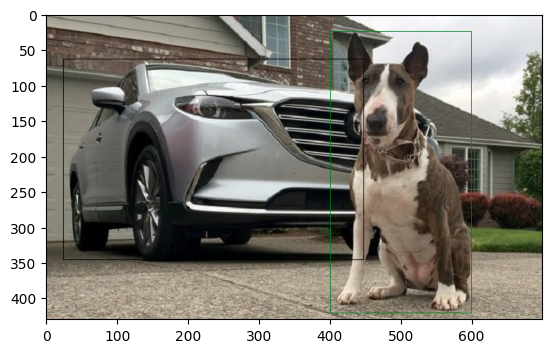

In [21]:
plt.imshow(bounding_boxes_img.permute(1,2,0)) # matplotlib format image